## Tutorial su API di Reddit
**Nome:** Giuseppe

**Cognome:** Condorelli

**Matricola:** 1000001910

**Corso:** Social Media Management

**Docente:** Antonino Furnari

**Anno Accademico:** 2021-2022

## Introduzione
<p>
Reddit è una piattaforma gratuita di social news, intrattenimento e forum che permette ai suoi utenti di discutere di qualsiasi argomento (anche detto topic) in uno delle sue tantissime categorie chiamate **subreddit**.

E' stato fondato il 23 giugno del 2005 a Medford da Steve Huffman e Alexis Ohanian e a febbraio del 2018 contava ben **542 milioni** di utenti al mese.

Le funzioni che reddit mette a disposizione degli utenti sono quelle di poter **postare** un topic in un desiderato subreddit che rispecchia l'argomento principale discusso nel post, **commentare** sotto quest'ultimi ed inoltre permette di fare degli **upvote** e dei **downvote** dei post e dei commenti.

Il numero di **vote** permette agli utenti di capire quanto l'argomento trattato dal post sia interessante e popolare, inoltre tramite i filtri provvisti dalla piattaforma è possibile anche ordinare i post visualizzati in base al numero di vote.
    
</p>
<p>
    <a href="https://www.reddit.com/dev/api/" target="_blank"> Documentazione Reddit API</a> <br>
    Per poter utilizzare tutte le API provviste da Reddit è necessario l'utilizzo di un token tramite OAuth 2, quindi sarà necessario creare un'account utente nella piattaforma nonchè seguire una serie di regole provviste da Reddit.
    <a href="https://www.reddit.com/wiki/api/" target="_blank"> Reddit API Access </a>
    </p>
    

## Profilo e Applicazione

### Creazione di un profilo utente

<p>Iniziamo col creare un proprio profilo utente.

Per fare ciò è semplicemente necessario dirigersi sul sito di Reddit: https://reddit.com

Dopodichè basta cliccare sul buttone SignUp cerchiato nella seguente schermata:

<img src="Immagini/SignUpButton.png">
</p>
<p>
     Fatto questo apparirà una finestra dove sarà necessario seguire gli step proposti dove verranno richiesti le informazioni necessarie a reddit per creare il profilo.
    Di seguito ci sono le varie schermate per la creazione profilo utente.
    <img src="Immagini/SignUp.png">
    <img src="Immagini/Username.png">
    <br>
    Fatto ciò basterà verificare l'account tramite il link che arriverà nell'email utilizzata e successivamente potremo collegarci al profilo tramite la piattaforma utilizzando le credenziali specificate.
</p>

## API keys

### Condizioni d'uso pt. 1
<p>
    Per utilizzare le API avremo bisogno di creare un'applicazione tramite il seguente link: <a href="https://docs.google.com/forms/d/e/1FAIpQLSezNdDNK1-P8mspSbmtC2r86Ee9ZRbC66u929cG2GX0T9UMyw/viewform" target="_blank"> https://docs.google.com/forms/d/e/1FAIpQLSezNdDNK1-P8mspSbmtC2r86Ee9ZRbC66u929cG2GX0T9UMyw/viewform</a>
</p>
<p>
    Il link ci porterà in un modulo google da compilare dove potremo leggere tutti i termini che stiamo accettando per l'utilizzo delle API ed inoltre ci verranno richieste alcune cose riguardo il nostro utilizzo delle reddit's API nonchè altre informazioni generali.
    <img src="Immagini/FormGoogle1.png">
    In particolare ci verrà richiesto un <b>OAUTH Client ID(s)</b>
    <img src="Immagini/FormGoogle2.png">
</p>

### Creazione applicazione

<p>
    Per ottenere un OAUTH Client ID(s) sarà necessario <a href="https://www.reddit.com/prefs/apps">creare un'applicazione</a> come mostrato nella figura sottostante.
    <img src="Immagini/CreateApp.png">
    Una volta compilati i form richiesti basterà cliccare <b>create app</b> e la nostra applicazione sarà creata.
    <img src="Immagini/CreatedApp.png">
    Guardando la schermata sovrastante <b style="color:blue">cerchiato in blu</b> sarà il nostro <b>OAUTH Client ID(s)</b> mentre <b style="color:green">cerchiato in verde</b> la nostra <b>secret key</b>.
</p>

### Condizioni d'uso pt.2

<p>
    Adesso che siamo riusciti ad ottenere l'OAUTH Client ID(s) possiamo finalmente inserirlo nel form ed inviarlo ottenendo la seguente schermata finale che ci conferma il completamento della richiesta.
    <img src="Immagini/FormGoogle3.png">
</p>



## Accesso alle API

### Utilizzo di OAuth con Reddit
<p> 
    OAuth è un protocollo aperto, semplice e sicuro che consente alle applicazioni di autenticare gli utenti e di interagire con Reddit per conto loro. Le informazioni dell’utente finale vengono trasferite in modo sicuro, senza rivelarne l’identità. In Reddit utilizziamo il protocollo OAuth per verificare che l’applicazione interagisca con Reddit per conto tuo nel rispetto delle autorizzazioni che hai concesso.
</p>   

### Codice utile
<p>
    In questa sezione verranno fornite e spiegate tutte le funzioni utili scritte in Python necessarie per poter utilizzare le API di Reddit.
</p>

<p>
    Nel seguente blocco di codice ci sono due variabili globali (<b>API key e API secret</b>) che abbiamo ottenuto creando l'applicazione precedentemente e che saranno necessarie per poter utilizzare le API di reddit.
</p>

<p>
    Inoltre saranno anche utili l'<b>username</b> e la <b>password</b> del nostro profilo creato sulla piattaforma.
</p>

In [1]:
# Reddit api key
KEY:str = "<API-KEY>"

# Reddit api secret
SECRET:str = "<API-SECRET>"
    
# Reddit Profile's Username
USERNAME:str = "<USERNAME>"

# Reddit Profile's Password
PASSWORD:str = "<PASSWORD>"
    
# URL base
URL = "https://oauth.reddit.com"

### Access token

Qui usiamo la nostra **key** e la nostra **secret key** ottenute nella creazione dell'applicazione

In [2]:
import requests

auth = requests.auth.HTTPBasicAuth(KEY, SECRET)

Qui invece decidiamo di utilizzare come metodo di autenticazione la password ed inseriamo la nostra **username** e **password**.

Questo ci permetterà di usare più API provviste da reddit

In [3]:
data = {'grant_type': 'password',
        'username': USERNAME,
        'password': PASSWORD}

Qui creiamo il nostro pacchetto http col metodo post e richiediamo il nostro access token a reddit

In [4]:
# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'SocialMediaTutorial/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

Dopodichè convertiamo la risposta in formato json, estraiamo l'access token e lo aggiungiamo all'header che utilizzeremo nelle chiamate RESTful

In [5]:
TOKEN = res.json()['access_token']

headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

Adesso che siamo riusciti ad ottenere l'access token possiamo finalmente utilizzare le API di reddit finchè quest'ultimo non scade (dura circa 2 ore)

## Utilizzo delle API RESTful

### 

<p>
    Lista reddit's api al seguente link: <a href="https://www.reddit.com/dev/api/" target="_blank"> Lista api </a>
</p>
<p>
    Reddit mette a disposizione una vasta lista di API che ci permettono di di fare di tutto, tra cui effettuare ricerche, commentare, votare e molto altro.
</p>

<p> 
    Di seguito verranno usate alcune di queste funzionalità per dare un esempio di come usarle.
</p>

### GET /api/v1/me
Per verificare che l'access token sia valido effettuiamo un semplice test utilizzando GET /api/v1/me che ci ritorna l'identità dell'user

In [6]:
res = requests.get(URL + "/api/v1/me", headers=headers)
print(res)

<Response [200]>


Il test ha dato una risposta positiva con codice 200, dunque reddit ci ha risposto con dati strutturati alla nostra richiesta che contengono informazioni riguardo il nostro profilo reddit

## POST /api/search_subreddits/

Questa funzione ci permette di, dato un valore query come parametro, cercare subreddits che abbiano all'interno del loro nome il valore da noi specificato

In [7]:
import json
res = requests.post(URL + '/api/search_subreddits/', headers=headers, params={'query': 'funny'})
print(json.dumps(res.json(),indent=4))

#Lunghezza 
print("Trovati " + str(len(res.json()['subreddits'])) + " subreddits con la parola funny")

{
    "subreddits": [
        {
            "active_user_count": 16329,
            "icon_img": "https://a.thumbs.redditmedia.com/kIpBoUR8zJLMQlF8azhN-kSBsjVUidHjvZNLuHDONm8.png",
            "key_color": "#0dd3bb",
            "name": "funny",
            "subscriber_count": 42321918,
            "is_chat_post_feature_enabled": true,
            "allow_chat_post_creation": false,
            "allow_images": true
        },
        {
            "active_user_count": 3353,
            "icon_img": "",
            "key_color": "",
            "name": "FunnyAnimals",
            "subscriber_count": 1082808,
            "is_chat_post_feature_enabled": true,
            "allow_chat_post_creation": false,
            "allow_images": true
        },
        {
            "active_user_count": 63,
            "icon_img": "https://b.thumbs.redditmedia.com/ROkYQyhSny03-rRLfQ1uwhPqb__zCSl3boeERGfHJHo.png",
            "key_color": "",
            "name": "funnysigns",
            "subscriber_count"

Come possiamo vedere dall'output sopra siamo riusciti a trovare ben 9 subreddits con la parola funny, inoltre reddit ci ha dato anche altre informazioni interessanti, tra cui ad esempio il numero di utenti attivi per ogni subreddit trovato.

## GET /r/subreddit/about

Utilizzando questa chiamata reddit ci risponde con una lista di informazioni più specifiche ed amplie riguardo il subreddit indicato. <br>
Nell'esempio sottostante prenderemo solo la **descrizione** del subreddit e la stamperemo in output

In [8]:
res = requests.get(URL + '/r/funny/about', headers=headers)
print(res.json()['data']['description'])

**Welcome to r/Funny:**


You may only post if you are funny. 


**Please read [our complete rules page](https://www.reddit.com/r/funny/wiki/rules) before posting.**

-----

[New to Reddit? Click here!](/wiki/reddit_101)

---
##### New "Subreddit Of The Month": [/r/PieceOfShitBookClub] (https://www.reddit.com/r/PieceOfShitBookClub/)


|||
|-|-|
| **Featured Subreddit of the Month: /r/PieceOfShitBookClub** | [Link to sticky post](https://www.reddit.com/r/funny/comments/wdbkwg/subreddit_of_the_month_august_2022/)

[Previous subs of the month] (https://www.reddit.com/r/funny/wiki/subofthemonthlist)

# Rules
*hover for details*

|||
|:------|:---|
|1. All posts must make an attempt at humor.|Humor is subjective, but all posts must at least make an attempt at humor. Posts which are intentionally disruptive, inane, or nonsensical will be removed. [Read more here.](https://www.reddit.com/r/funny/wiki/rules)|
|2. No memes, HIFW, MRW, MeIRL, DAE, or similar posts.|If your submission begins with

## GET /r/subreddit
Con questa chiamata è possibile ottenere i post o submissions presenti nel subreddit.
Di seguito un esempio con il subreddit 'funny'

In [9]:
res = requests.get(URL + '/r/funny', headers=headers)
print(json.dumps(res.json(), indent=4))

{
    "kind": "Listing",
    "data": {
        "after": "t3_wo10wx",
        "dist": 27,
        "modhash": null,
        "geo_filter": null,
        "children": [
            {
                "kind": "t3",
                "data": {
                    "approved_at_utc": null,
                    "subreddit": "funny",
                    "selftext": "Hey there, folks!\n\nAs you're probably aware, there are quite a few very talented, very funny artists who offer their comics in /r/Funny... but there are also a growing number of \"comics\" here that are little more than low-effort ways of bypassing Rule 9. Moreover, subscribers have been expressing their concerns\u00b9 that comics (of both varieties) almost always eclipse every other variety of content offered here.\n\nBasically, on any given day, a poorly made comic featuring a stolen joke has a much better chance of being seen than something well-produced and original. Some of this is the fault of the \"Ennui Engine,\" but it's also t

Delle **submissions** ottenute prenderemo solo la prima e ne stamperemo titolo, testo e upvotes.

In [10]:
x = res.json()['data']['children'][0]['data'];
print("Titolo: " + x['title'])
print("Testo: " + x['selftext'])
print("Upvotes: " + str(x['ups']))

Titolo: Going forward, comics may only be posted on Wednesdays and Sundays.
Testo: Hey there, folks!

As you're probably aware, there are quite a few very talented, very funny artists who offer their comics in /r/Funny... but there are also a growing number of "comics" here that are little more than low-effort ways of bypassing Rule 9. Moreover, subscribers have been expressing their concerns¹ that comics (of both varieties) almost always eclipse every other variety of content offered here.

Basically, on any given day, a poorly made comic featuring a stolen joke has a much better chance of being seen than something well-produced and original. Some of this is the fault of the "Ennui Engine," but it's also the result of there being *so many* comics posted in /r/Funny.

To address this, we're going to experiment with a new approach:

Going forward, comics may only be posted on Wednesdays and Sundays PDT (Pacific Daylight Time), and only by the people creating them.²

Our hopes with this 

# PRAW: API Reddit Python 

**Praw** è un API di terze parti che permette un più facile utilizzo delle API provviste da reddit.
<br>
La documentazione di Praw è disponibile al seguente link: <a href="https://praw.readthedocs.io/en/stable/" target="_blank"> PRAW's documentation </a>

Di seguito ci saranno gli stessi esempi fatti precedentemente ma con l'utilizzo di praw

In [11]:
import praw

reddit = praw.Reddit(client_id = KEY, client_secret = SECRET, password = PASSWORD, user_agent = "SocialMediaTutorial", username = USERNAME,)

subreddit = reddit.subreddit("funny")

print(subreddit.description)


**Welcome to r/Funny:**


You may only post if you are funny. 


**Please read [our complete rules page](https://www.reddit.com/r/funny/wiki/rules) before posting.**

-----

[New to Reddit? Click here!](/wiki/reddit_101)

---
##### New "Subreddit Of The Month": [/r/PieceOfShitBookClub] (https://www.reddit.com/r/PieceOfShitBookClub/)


|||
|-|-|
| **Featured Subreddit of the Month: /r/PieceOfShitBookClub** | [Link to sticky post](https://www.reddit.com/r/funny/comments/wdbkwg/subreddit_of_the_month_august_2022/)

[Previous subs of the month] (https://www.reddit.com/r/funny/wiki/subofthemonthlist)

# Rules
*hover for details*

|||
|:------|:---|
|1. All posts must make an attempt at humor.|Humor is subjective, but all posts must at least make an attempt at humor. Posts which are intentionally disruptive, inane, or nonsensical will be removed. [Read more here.](https://www.reddit.com/r/funny/wiki/rules)|
|2. No memes, HIFW, MRW, MeIRL, DAE, or similar posts.|If your submission begins with

In [12]:
for submission in subreddit.hot(limit=1):
    print("Titolo: " + submission.title)
    print("Testo: " + submission.selftext)
    print("Upvotes: " + str(submission.ups))

Titolo: Going forward, comics may only be posted on Wednesdays and Sundays.
Testo: Hey there, folks!

As you're probably aware, there are quite a few very talented, very funny artists who offer their comics in /r/Funny... but there are also a growing number of "comics" here that are little more than low-effort ways of bypassing Rule 9. Moreover, subscribers have been expressing their concerns¹ that comics (of both varieties) almost always eclipse every other variety of content offered here.

Basically, on any given day, a poorly made comic featuring a stolen joke has a much better chance of being seen than something well-produced and original. Some of this is the fault of the "Ennui Engine," but it's also the result of there being *so many* comics posted in /r/Funny.

To address this, we're going to experiment with a new approach:

Going forward, comics may only be posted on Wednesdays and Sundays PDT (Pacific Daylight Time), and only by the people creating them.²

Our hopes with this 

## Conclusioni su PRAW

Come possiamo vedere utilizzando praw siamo riusciti a fare le stesse cose ma molto più facilmente e, ancora più importante, la lettura del codice è molto più semplice ed organizzata

# Estrazione dati e analisi

Per questa sezione analizzeremo il subreddit "Italy", in particolare verranno contate le occorrenze delle parole riguardanti alcuni degli argomenti più discussi in italia nella sezione "New" delle submissions caricate dagli utenti.
<br>
Nello specifico verrà analizzata la presenza delle seguenti parole:
<ul>
    <li>
        Covid: uno degli argomenti più discussi negli ultimi anni
    </li>
    <li>
        Russia: conflitto russo-ucraino
    </li>
    <li>
        Ucraina: conflitto russo-ucraino
    </li>
    <li>
        Governo
    </li>
    <li>
        Immigrati: una parola anch'essa diffusa tra i media italiani
    </li>
    <li>
        Crisi: situazione attuale dell'Italia
    </li>
    <li>
        Calcio
    </li>
    <li>
        Sicilia
    </li>
    <li>
        Catania
    </li>
</ul>


In [13]:
import re
import pandas as pd

subreddit = reddit.subreddit("italy")

r = pd.Series({'Covid': 0, 'Russia':0, 'Ucraina':0, 'Governo':0, 'Immigrati':0,
               'Crisi':0, 'Calcio':0, 'Sicilia':0, 'Catania':0})

for submission in subreddit.new(limit=1000):
    if(re.search("(.COVID.)|(.[Cc]oronavirus.)", submission.title) or re.search("(.COVID.)|(.[Cc]oronavirus.)", submission.selftext)):
        r['Covid'] +=1
    if(re.search(".[Rr]ussia.", submission.title) or re.search(".[Rr]ussia.", submission.selftext)):
        r['Russia'] += 1
    if(re.search(".[Uu]craina.", submission.title) or re.search(".[Uu]craina.", submission.selftext)):
        r['Ucraina'] += 1
    if(re.search(".[Gg]overno.", submission.title) or re.search(".[Gg]overno.", submission.selftext)):
        r['Governo'] += 1
    if(re.search(".[Ii]mmigr.", submission.title) or re.search(".[Ii]mmigr.", submission.selftext)):
        r['Immigrati'] += 1
    if(re.search(".[Cc]risi.", submission.title) or re.search(".[Cc]risi.", submission.selftext)):
        r['Crisi'] += 1
    if(re.search(".[Cc]alcio.", submission.title) or re.search(".[Cc]alcio.", submission.selftext)):
        r['Calcio'] += 1
    if(re.search(".[Ss]icilia.", submission.title) or re.search(".[Ss]icilia.", submission.selftext)):
        r['Sicilia'] += 1
    if(re.search(".[Cc]atania.", submission.title) or re.search(".[Cc]atania.", submission.selftext)):
        r['Catania'] += 1

In [14]:
print("Numero occorrenze delle parole elencate nelle submissions del subreddit Italy\n\n")

r

Numero occorrenze delle parole elencate nelle submissions del subreddit Italy




Covid         2
Russia        5
Ucraina      78
Governo      40
Immigrati     5
Crisi        27
Calcio       19
Sicilia      10
Catania       2
dtype: int64

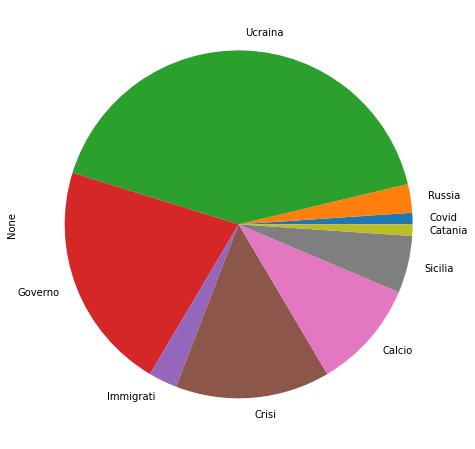

In [15]:
from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))

r.plot.pie()

plt.show()

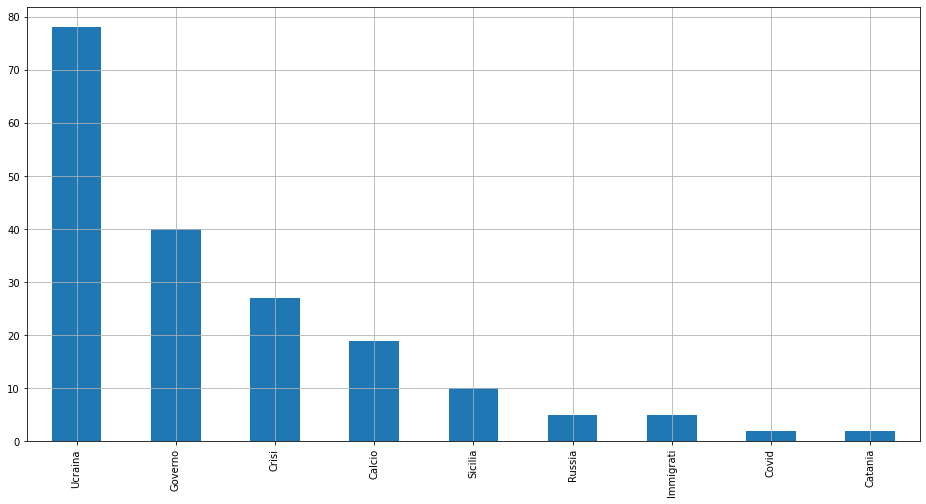

In [16]:
plt.figure(figsize=(16,8))
r.sort_values(ascending=False).plot.bar()
plt.grid()
plt.show()

In [17]:
normalizzata = (r-r.min())/(r.max()-r.min())
normalizzata

Covid        0.000000
Russia       0.039474
Ucraina      1.000000
Governo      0.500000
Immigrati    0.039474
Crisi        0.328947
Calcio       0.223684
Sicilia      0.105263
Catania      0.000000
dtype: float64

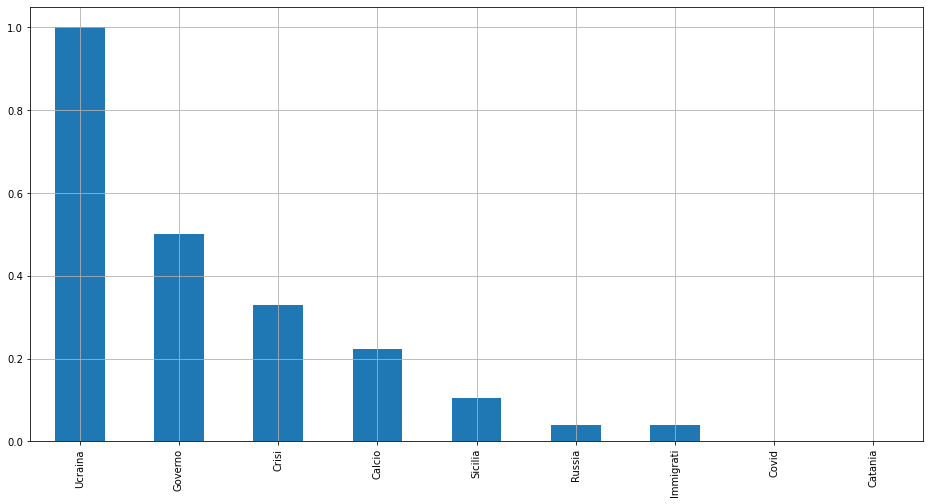

In [18]:
plt.figure(figsize=(16,8))
normalizzata.sort_values(ascending=False).plot.bar()
plt.grid()
plt.show()

Come possiamo intuire dal grafici soprastanti nel subreddit viene ampiamente discusso dell'argomento **Ucraina** nell'ultimo periodo.<br>
Inoltre troviamo anche tante occorrenze riguardo Governo e Crisi.<br>
Tuttavia, a differenza di termini come **"Sicilia"** e **"Catania"** che ho voluto analizzare per curiosità e per cui potevamo aspettarci numeri bassi, per nostra sorpresa notiamo che negli ultimi post si è parlato pochissimo di **Covid**, il che ci aiuta ad intuire che le attenzioni **italiane** si siano spostate sulla **crisi di governo** e sul **conflitto russo-ucraino**.

# Conclusione

L'utilizzo delle **api Reddit** non è molto difficile. Infatti ottenere l'access token non è molto complicato ed utilizzare le api provviste da reddit risulta molto semplice grazie all'ampia documentazione provvista da quest'ultimo.
<br>
Inoltre è molto piacevole utilizzare le api di terze parti **Praw** che rendono il tutto decisamente molto più semplice ed alla portata di tutti. <br>
L'unica pecca di Reddit è quella di non poter **ordinare** e/o **filtrare** le submissions (post) per data, infatti per fare ciò è necessario controllare la data di creazione di ogni singolo submission, il che rende il tutto più complicato. <br>
Tuttavia è stato possibile fare una semplice ma interessante analisi dati sul **subreddit Italy** che ci ha fornito, anche se in piccola parte, alcune idee sulle argomentazioni principali del subreddit.